<a href="https://colab.research.google.com/github/sakhawat3003/From-Exploratory-Data-Analysis-to-Machine-Learning-to-Deep-Learning/blob/main/Practical_Implementation_of_Data_Analysis_to_Machine_Learning_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [ ]:
#how to create panda series object
series= pd.Series(np.linspace(1,10,10))

In [ ]:
series

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,10.0


In [ ]:
#first 5 elements in the series
series[0:5]

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


## **Data Analysis and Visuzalization on Iris Dataset**

In [ ]:
#load the iris dataset from seaborn library.
#you can also load the dataset from scikit learn but that requires a little bit of data preprocessing
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### **Exploratory Analysis**

In [ ]:
#first 5 rows of the iris dataset
iris.iloc[0:5, : ]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#save the name of the columns. You may need it later.
column_names=iris.columns.to_list()

In [ ]:
column_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [ ]:
#maximum length of the petal
iris['petal_length'].max()

6.9

### **Filtering the Dataset**

In [ ]:
#number of species with petal length more than 5.7
len(iris[iris['petal_length']>5.7])

16

In [ ]:
#get the count of elements in each column based on condition
iris[iris['petal_length']>5.7].count()

,0
sepal_length,16
sepal_width,16
petal_length,16
petal_width,16
species,16


In [ ]:
#get the dimensions of the conditional data frame
iris[iris['petal_length']>5.7].shape

(16, 5)

In [ ]:
iris.count()

,0
sepal_length,150
sepal_width,150
petal_length,150
petal_width,150
species,150


In [ ]:
#different ways to get the dimensions and length of the data frame
iris.shape

(150, 5)

In [ ]:
iris.index.size

150

In [ ]:
len(iris)

150

In [ ]:
#get the specific columns
iris[['sepal_length','petal_length']].head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [ ]:
#you can filter the rows with conditions and get specific columns
iris.loc[iris['sepal_length']>5.7, ['sepal_length','petal_length']].head()

,sepal_length,petal_length
14,5.8,1.2
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
54,6.5,4.6


In [ ]:
iris[iris['sepal_length']>5.7].head()

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor


### **Line Plots with Seaborn**

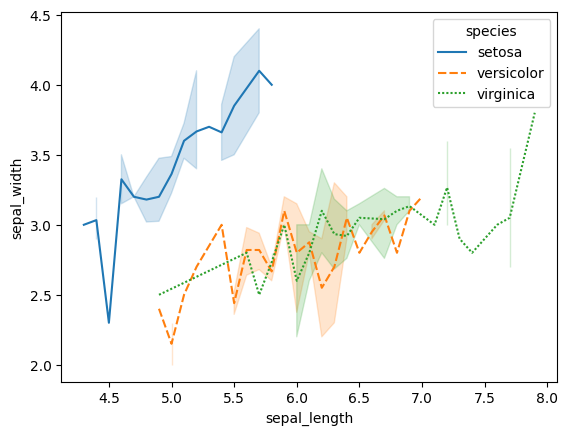

In [ ]:
#you can get separate line plots by providing the "hue='species'" argument.
sns.lineplot(data=iris, x='sepal_length', y='sepal_width', hue='species', style='species');

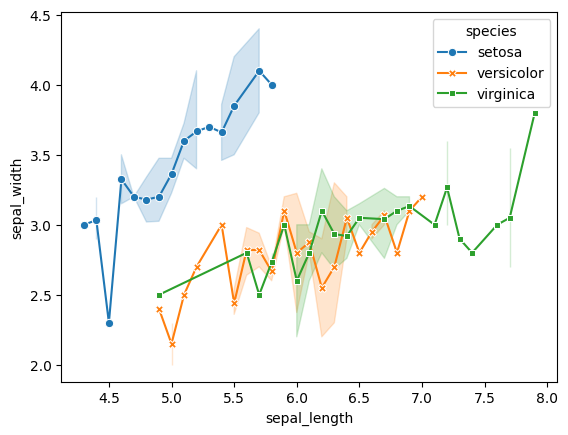

In [ ]:
#marker=True will show all the points as marked and no dashed lines
sns.lineplot(data=iris, x='sepal_length', y='sepal_width', hue='species', style='species', markers=True, dashes=False);

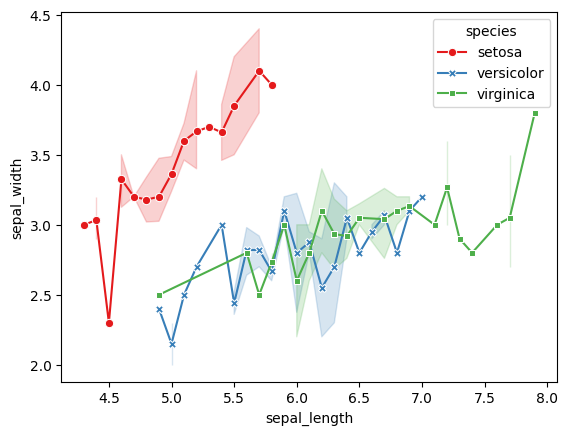

In [ ]:
#you can choose different color palette
sns.lineplot(data=iris, x='sepal_length', y='sepal_width', hue='species', style='species', markers=True, dashes=False, palette='Set1');

### **Regression Plot**

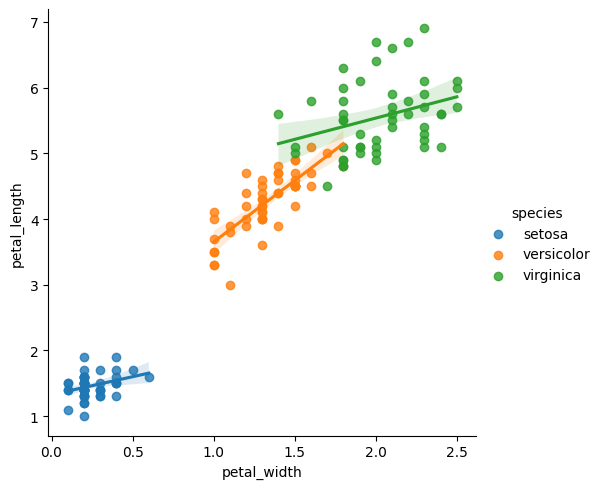

In [ ]:
#By default it's a first order linear plot
sns.lmplot(data=iris, x='petal_width', y='petal_length', hue='species');

In [ ]:
column_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

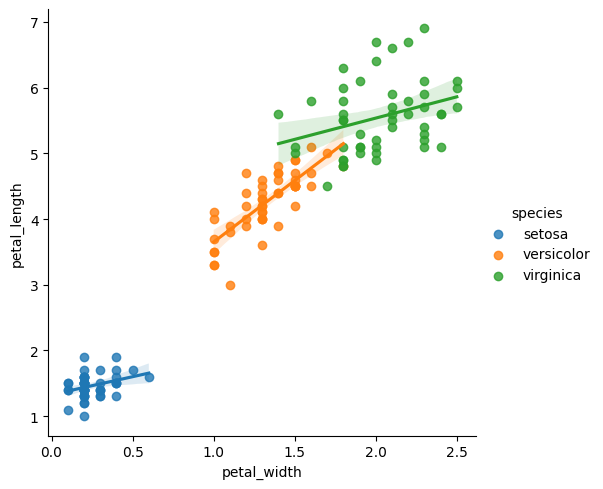

In [ ]:
#you can explicitly stop lowess method to fit the data
sns.lmplot(data=iris, x='petal_width', y='petal_length', hue='species', scatter=True, lowess=False, order=1);

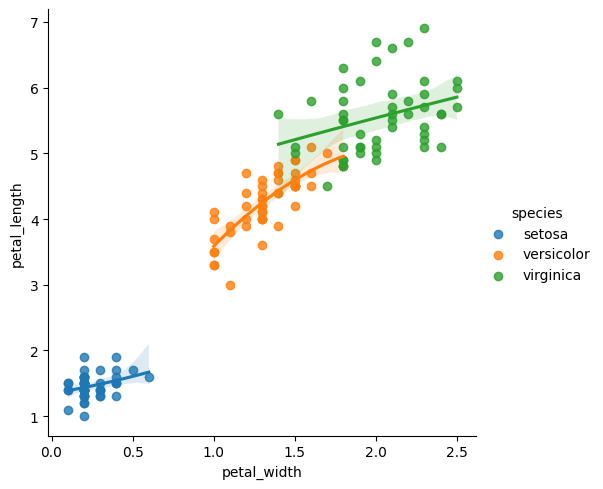

In [ ]:
#fit a second order linear regression
sns.lmplot(data=iris, x='petal_width', y='petal_length', hue='species', scatter=True, lowess=False, order=2);

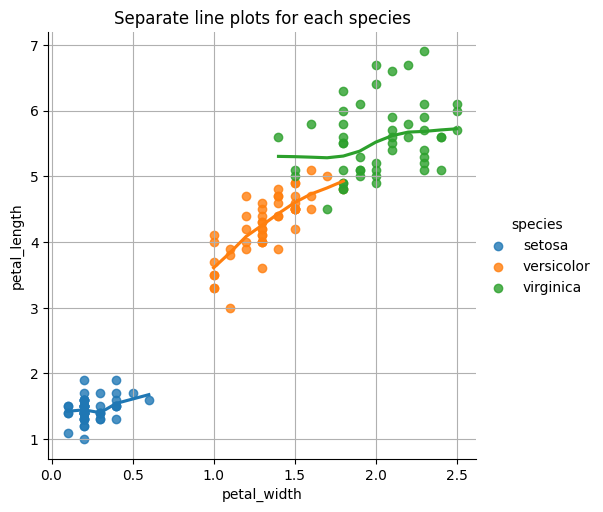

In [ ]:
#lowess method can smoothly fit the data for each of the species
sns.lmplot(data=iris, x='petal_width', y='petal_length', hue='species', scatter=True, lowess= True, ci=None)
plt.title('Separate line plots for each species')
plt.grid();

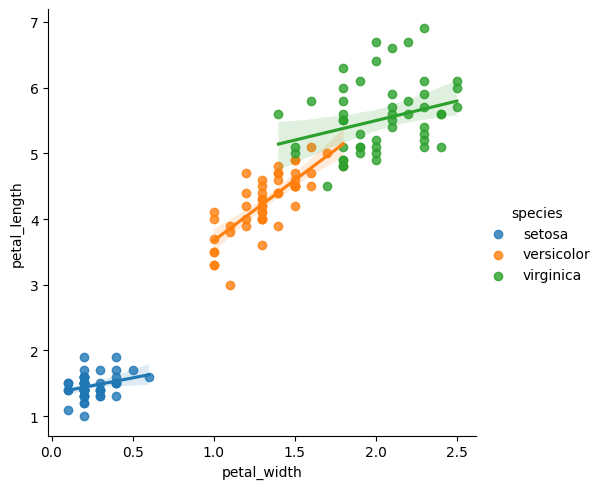

In [ ]:
sns.lmplot(data=iris, x='petal_width', y='petal_length', hue='species', scatter=True, robust=True);

In [ ]:
#randor number generation. If your friend runs the code with the same RandomState he will get
#the exact same sequences of random number
rng=np.random.RandomState(42)
rng.randint(0,20,5)

array([ 6, 19, 14, 10,  7])

In [ ]:
rng.randint(0,20,5)

array([ 6, 19, 14, 10,  7])

### **Group by method**

In [ ]:
#average petal length for each of the species
iris['petal_length'].groupby(iris['species']).mean()

,petal_length
species,
setosa,1.462
versicolor,4.260
virginica,5.552


In [ ]:
#mean, median, maximum, and minimum values of petal length for each of the species
iris['petal_length'].groupby(iris['species']).aggregate(['mean', 'median', 'max', 'min'])

,mean,median,max,min
species,,,,
setosa,1.462,1.50,1.9,1.0
versicolor,4.260,4.35,5.1,3.0
virginica,5.552,5.55,6.9,4.5


### **Create Table**

In [ ]:
iris['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


### **Centering Data using lambda**

In [ ]:
#centering petal length in each group of species by substracting from the group mean
iris['petal_length'].groupby(iris['species']).transform(lambda x: x-x.mean()).head()

,petal_length
0,-0.062
1,-0.062
2,-0.162
3,0.038
4,-0.062


In [ ]:
#existance of null values
iris.isnull().any()

,0
sepal_length,False
sepal_width,False
petal_length,False
petal_width,False
species,False


## **Planets Dataset**

In [ ]:
planets=sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### **Grouping each Method**

In [ ]:
#number of planets discovered by each method sorted in ascending order
planets['number'].groupby(planets['method']).sum().sort_values(ascending=False)

,number
method,
Radial Velocity,952
Transit,776
Imaging,50
Microlensing,27
Eclipse Timing Variations,15
Pulsar Timing,11
Transit Timing Variations,9
Orbital Brightness Modulation,5
Astrometry,2


## **Titanic Dataset Analysis**

In [ ]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.isnull().any()

,0
survived,False
pclass,False
sex,False
age,True
sibsp,False
parch,False
fare,False
embarked,True
class,False
who,False


In [ ]:
#Dimension
titanic.shape

(891, 15)

In [ ]:
#total number of null values in each column
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
#rows with null values in the embarked column
titanic[titanic['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


### **Multilayer Grouping**

In [ ]:
#average and sum of survial for male and female
titanic['survived'].groupby(titanic['sex']).aggregate(['mean','sum'])

,mean,sum
sex,,
female,0.742038,233
male,0.188908,109


In [ ]:
#survival percentage and sum in each class for male and female
titanic['survived'].groupby([titanic['sex'], titanic['class']], observed=True).aggregate(['mean','sum']).unstack()

mean                       sum             
class      First    Second     Third First Second Third
sex                                                    
female  0.968085  0.921053  0.500000    91     70    72
male    0.368852  0.157407  0.135447    45     17    47

### **Pivot Table instead of Group by method**

In [ ]:
#pivot table is more convenient to use. Here index='sex' are rows and columns='class' where the data
#wil be distributed for the rows
titanic.pivot_table('survived', index='sex', columns='class', observed=True)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
#multiple aggregrate functions can also be used
titanic.pivot_table('survived', index='sex', columns='class', aggfunc=['mean','sum'] ,observed=True)

mean                       sum             
class      First    Second     Third First Second Third
sex                                                    
female  0.968085  0.921053  0.500000    91     70    72
male    0.368852  0.157407  0.135447    45     17    47

In [ ]:
#create an age group for 0-20 years old and 20-80 years old
age_group=pd.cut(titanic['age'], [0,20,80])
age_group.head()

,age
0,"(20, 80]"
1,"(20, 80]"
2,"(20, 80]"
3,"(20, 80]"
4,"(20, 80]"


In [ ]:
age_group.shape

(891,)

In [ ]:
#male and female are separated in two different age groups and survival percentage, sum are
#distributed over different classes.
titanic.pivot_table(values='survived', index=['sex',age_group], columns='class', aggfunc=['mean','sum'] ,observed=True)

mean                       sum             
class               First    Second     Third First Second Third
sex    age                                                      
female (0, 20]   0.928571  1.000000  0.510638    13     16    24
       (20, 80]  0.971831  0.896552  0.418182    69     52    23
male   (0, 20]   0.571429  0.526316  0.197368     4     10    15
       (20, 80]  0.382979  0.062500  0.129944    36      5    23

In [ ]:
titanic[(titanic['sex']=='female') & (titanic['class']=='First')].shape

(94, 15)

In [ ]:
titanic[(titanic['sex']=='female') & (titanic['class']=='Third')].shape

(144, 15)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic['sex'].groupby(titanic['class'], observed=True).value_counts()

class   sex   
First   male      122
        female     94
Second  male      108
        female     76
Third   male      347
        female    144
Name: count, dtype: int64

In [ ]:
#number of male and female survivors/deads in each class
titanic.pivot_table(values='sex', index='class', columns='survived', aggfunc='value_counts', observed=True)

survived         0   1
class  sex            
First  female    3  91
       male     77  45
Second female    6  70
       male     91  17
Third  female   72  72
       male    300  47

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
column_names=titanic.columns.to_list()

In [ ]:
column_names

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

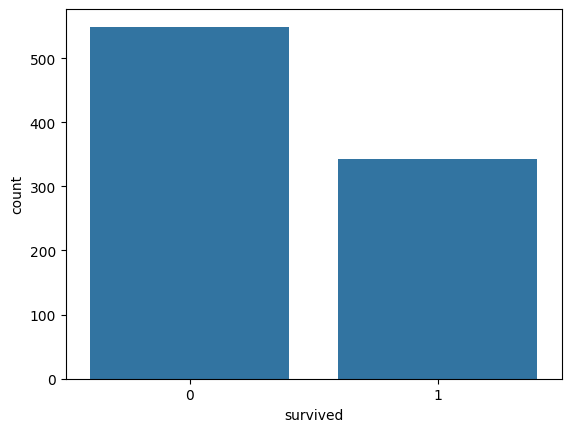

In [ ]:
#survival count
sns.countplot(data=titanic, x='survived');

In [ ]:
titanic['survived'].value_counts()

,count
survived,
0,549
1,342


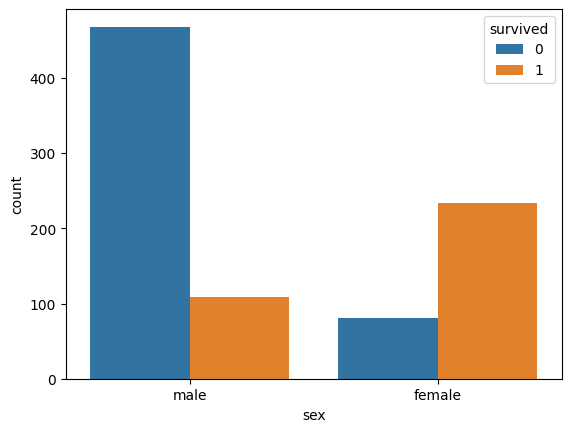

In [ ]:
#survival by gender
sns.countplot(data=titanic, x='sex', hue='survived');

In [ ]:
titanic.pivot_table(values='survived', index='sex', observed=True, aggfunc=['mean', 'sum'])

,mean,sum
,survived,survived
sex,,
female,0.742038,233
male,0.188908,109


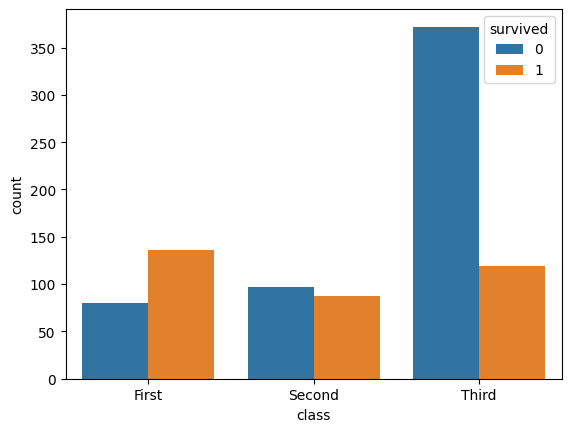

In [ ]:
#survival by class
sns.countplot(data=titanic, x='class', hue='survived');

In [ ]:
titanic.pivot_table(values='survived', index='class', observed=True, aggfunc=['mean', 'sum'])

,mean,sum
,survived,survived
class,,
First,0.629630,136
Second,0.472826,87
Third,0.242363,119


In [ ]:
titanic.pivot_table(values='survived', index='class', columns='sex', observed=True, aggfunc=['mean', 'sum'])

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

### **Distribution Plot**

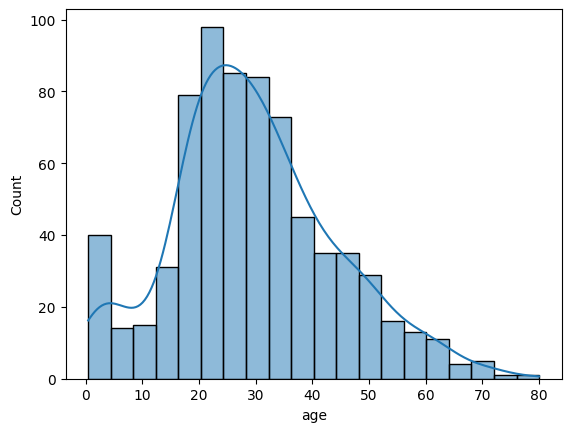

In [ ]:
#age distribution. kde arugment in needed to draw the distribution curve
sns.histplot(data=titanic, x='age', kde=True);

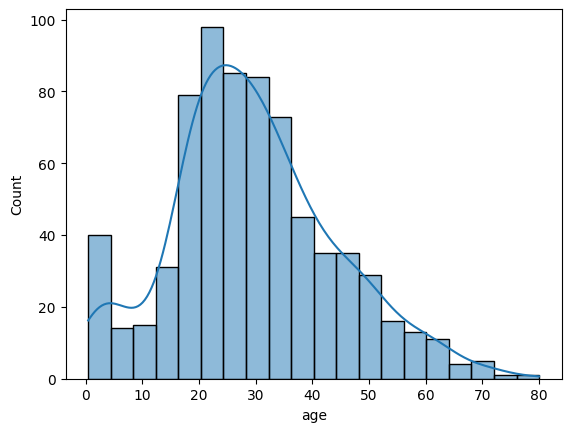

In [ ]:
sns.histplot(x=titanic['age'].dropna(), kde=True);

## **Titanic Dataset Preprocessing**

In [ ]:
#drop irrelevant columns
titanic_clean=titanic.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town', 'alone', 'alive'])
titanic_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#most frequent element in the embarked column is "S"
titanic_clean['embarked'].mode()[0]

'S'

In [ ]:
#fill in the missing values
titanic_clean['age']=titanic_clean['age'].fillna(titanic_clean['age'].median())
titanic_clean['embarked']=titanic_clean['embarked'].fillna(titanic_clean['embarked'].mode()[0])

In [ ]:
titanic_clean.isnull().any()

,0
survived,False
pclass,False
sex,False
age,False
sibsp,False
parch,False
fare,False
embarked,False


In [ ]:
#feature engineering
titanic_clean['family_size']=titanic_clean['sibsp']+titanic_clean['parch']
titanic_clean['is_alone']=titanic_clean['family_size'].apply(lambda x: 1 if x==0 else 0)
titanic_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family_size,is_alone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [ ]:
X=titanic_clean.drop(columns=['survived'])
y=titanic_clean['survived']

### **Train Set and Test Set**

In [ ]:
train_set, test_set, train_labels, test_labels=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#after family column is created, no need for the sibsp and parch column
train_set=train_set.drop(columns=['sibsp', 'parch'])
test_set=test_set.drop(columns=['sibsp', 'parch'])

In [ ]:
train_set.head()

,pclass,sex,age,fare,embarked,family_size,is_alone
331,1,male,45.5,28.5000,S,0,1
733,2,male,23.0,13.0000,S,0,1
382,3,male,32.0,7.9250,S,0,1
704,3,male,26.0,7.8542,S,1,0
813,3,female,6.0,31.2750,S,6,0


### **Transformation Pipeline**

In [ ]:
#build the transformation pipelines
categorical_features=['pclass','sex','embarked']
numerical_features=['age','fare','family_size','is_alone']

In [ ]:
numerical_pipeline=make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
categorical_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [ ]:
total_pipeline=ColumnTransformer([('numerical', numerical_pipeline, numerical_features),
 ('categorical', categorical_pipeline, categorical_features)])

In [ ]:
train_transform=total_pipeline.fit_transform(train_set)
test_transform=total_pipeline.transform(test_set)

In [ ]:
model=RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(train_transform, train_labels)

RandomForestClassifier(random_state=42)

In [ ]:
predictions=model.predict(test_transform)

In [ ]:
accuracy_score(test_labels, predictions)

0.8156424581005587

In [ ]:
confusion_matrix(test_labels, predictions)

array([[89, 16],
       [17, 57]])

In [ ]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### **Correlation Coefficient**

In [ ]:
import numpy as np
physics_scores=np.array([15,12,8,8,7,7,7,6,5,3])
history_score=np.array([10,25,17,11,13,17,20,13,9,15])
r=np.corrcoef(physics_scores,history_score)[0,1]
print(r)

0.14499815458068518


###"pipeline" instead of "make_pipeline"

In [ ]:
titanic=sns.load_dataset('titanic')
titanic_clean=titanic.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town', 'alone', 'alive'])
titanic_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#fill in the missing values
titanic_clean['age']=titanic_clean['age'].fillna(titanic_clean['age'].median())
titanic_clean['embarked']=titanic_clean['embarked'].fillna(titanic_clean['embarked'].mode()[0])

In [ ]:
#feature engineering
titanic_clean['family_size']=titanic_clean['sibsp']+titanic_clean['parch']
titanic_clean['is_alone']=titanic_clean['family_size'].apply(lambda x: 1 if x==0 else 0)
titanic_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family_size,is_alone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [ ]:
X=titanic_clean.drop(columns=['survived'])
y=titanic_clean['survived']

In [ ]:
train_set, test_set, train_labels, test_labels=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_set=train_set.drop(columns=['sibsp', 'parch'])
test_set=test_set.drop(columns=['sibsp', 'parch'])

In [ ]:
train_set.head()

,pclass,sex,age,fare,embarked,family_size,is_alone
331,1,male,45.5,28.5000,S,0,1
733,2,male,23.0,13.0000,S,0,1
382,3,male,32.0,7.9250,S,0,1
704,3,male,26.0,7.8542,S,1,0
813,3,female,6.0,31.2750,S,6,0


### **Named Transformation Pipeline**

In [ ]:
#build the transformation pipelines
categorical_features=['pclass','sex','embarked']
numerical_features=['age','fare','family_size','is_alone']

In [ ]:
#name transformers are required when we need to access different parameters of these transformers later
#for example, to find the importance of different variables
numerical_pipeline=Pipeline([('imputer', SimpleImputer(strategy='median')), ('stdscaler', StandardScaler())])
categorical_pipeline=Pipeline([('cat_imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())])

In [ ]:
total_pipeline=ColumnTransformer([('numerical', numerical_pipeline, numerical_features),
 ('categorical', categorical_pipeline, categorical_features)])

## **Random Forest Classifier**

In [ ]:
model=Pipeline([('preprocessor', total_pipeline), ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

In [ ]:
model.fit(train_set, train_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stdscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'family_size',
                                                   'is_alone']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
predictions=model.predict(test_set)

### **Accuracy on the Test Set for Random Forest Classifier**

In [ ]:
accuracy_score(test_labels, predictions)

0.8156424581005587

In [ ]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### **Feature Importance**

In [ ]:
#name of the categorical columns those were hot encoded by categorical transformer
one_hot_columns=model.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['onehot']\
.get_feature_names_out(categorical_features)

In [ ]:
one_hot_columns

array(['pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'], dtype=object)

In [ ]:
all_features=numerical_features+list(one_hot_columns)
all_features

['age',
 'fare',
 'family_size',
 'is_alone',
 'pclass_1',
 'pclass_2',
 'pclass_3',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S']

In [ ]:
#importance of the features
importances=model.named_steps['classifier'].feature_importances_

In [ ]:
#create a dataframe with the name of the features and the importance
feature_importances_df=pd.DataFrame({'features': all_features, 'importance': importances}).sort_values('importance', ascending=False)
feature_importances_df

,features,importance
1,fare,0.259766
0,age,0.250824
8,sex_male,0.153141
7,sex_female,0.134762
2,family_size,0.064589
6,pclass_3,0.047704
4,pclass_1,0.024221
5,pclass_2,0.018346
11,embarked_S,0.013057
3,is_alone,0.013056


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
new_model=Pipeline([('tor_matha', total_pipeline), ('svm_classifier', SVC(random_state=42))])

In [ ]:
new_model.fit(train_set, train_labels)

Pipeline(steps=[('tor_matha',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stdscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'family_size',
                                                   'is_alone']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('svm_classifier', SVC(random_state=42))])

In [ ]:
svm_predictions=new_model.predict(test_set)

### **Accuracy Support Vector Machine**

In [ ]:
accuracy_score(test_labels, svm_predictions)

0.8156424581005587

In [ ]:
print(classification_report(test_labels, svm_predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



## **K-nearest neighbors**

In [ ]:
model=Pipeline([('preprocessor', total_pipeline), ('K_classifier', KNeighborsClassifier(n_neighbors=5))])

In [ ]:
model.fit(train_set, train_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stdscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'family_size',
                                                   'is_alone']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('K_classifier', KNeighborsClassifier())])

In [ ]:
k_predictions=model.predict(test_set)

### **Test accuracy K-nearest Neighbors**

In [ ]:
accuracy=accuracy_score(test_labels, k_predictions)
print(f'Test Accuracy for K-nearest Neighbors: {round(accuracy, 2)}')

Test Accuracy for K-nearest Neighbors: 0.81


In [ ]:
print(classification_report(test_labels, k_predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## **Tensorflow and Keras**

In [ ]:
#Separate features and response variable
X=titanic_clean.drop(columns=['survived'])
y=titanic_clean['survived']

### **Train-Test Set**

In [ ]:
train_set, test_set, train_labels, test_labels=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_set=train_set.drop(columns=['sibsp', 'parch'])
test_set=test_set.drop(columns=['sibsp', 'parch'])
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

### **Tranformation Pipeline**

In [ ]:
#build the transformation pipelines
categorical_features=['pclass','sex','embarked']
numerical_features=['age','fare','family_size','is_alone']

In [ ]:
numerical_pipeline=make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
categorical_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [ ]:
total_pipeline=ColumnTransformer([('numerical', numerical_pipeline, numerical_features),
 ('categorical', categorical_pipeline, categorical_features)])

In [ ]:
train_transform=total_pipeline.fit_transform(train_set)
test_transform=total_pipeline.transform(test_set)

### **Building Keras Model**

In [ ]:
#it's a modern way to build the keras model. Input shape of the train data should be put on the first layer.
model=Sequential([
    Input(shape=(train_transform.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the model
model.fit(train_transform, train_labels, epochs=13, batch_size=32, validation_split=0.2)

Epoch 1/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8362 - loss: 0.3588 - val_accuracy: 0.8042 - val_loss: 0.4292
Epoch 2/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8738 - loss: 0.3120 - val_accuracy: 0.7972 - val_loss: 0.4205
Epoch 3/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8616 - loss: 0.3338 - val_accuracy: 0.8112 - val_loss: 0.4288
Epoch 4/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8792 - loss: 0.3080 - val_accuracy: 0.7972 - val_loss: 0.4463
Epoch 5/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8583 - loss: 0.3322 - val_accuracy: 0.8322 - val_loss: 0.4197
Epoch 6/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8468 - loss: 0.3463 - val_accuracy: 0.8252 - val_loss: 0.4177
Epoch 7/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8654 - loss: 0.3232 - val_accuracy: 0.8182 - val_loss: 0.4527
Epoch 8/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8959 - loss: 0.3029 - val_accuracy: 0.8042 - val_los

### **Accuracy of the keras model**

In [ ]:
test_loss, test_accuracy=model.evaluate(test_transform, test_labels, verbose=0)
print(f'Accuracy on the Test Set: {round(test_accuracy, 2)}')

Accuracy on the Test Set: 0.83
